<a href="https://www.kaggle.com/code/atopor/hw-titanic?scriptVersionId=214040163" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titandata/Titanic.csv


In [3]:
df = pd.read_csv('/kaggle/input/titandata/Titanic.csv')

# Анализ признаков

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#Так как в датасете наблюдаем пропуски, то заполняем их медианными значениями
df['Age'] = df['Age'].fillna(df['Age'].median())
df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True) # Исправлено на inplace=True

df['Embarked'] = df['Embarked'].fillna('S')
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Теперь видно, что пропусков больше нет

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
survived = df['Survived'].value_counts()
survived

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
#Выживших: 342, погибших 549, что почти в 3 раза больше

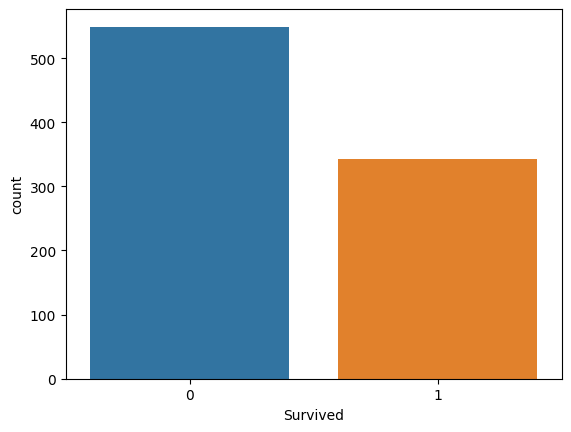

In [15]:
#Построим график количества выживших и количества умерших людей
sns.countplot(data=df, x='Survived')
plt.show()

***Вывод:*** как можем увидеть по графику, количество умерших преобладает

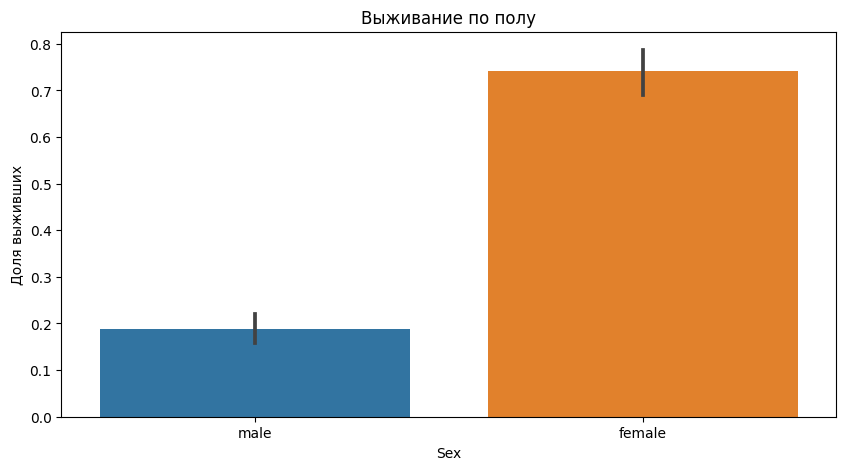

In [17]:
#Проверим, как пол влиял на выживаемость пассажиров
plt.figure(figsize=(10, 5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Выживание по полу')
plt.ylabel('Доля выживших')
plt.show()

***Вывод:*** женщин выжило больше, чем мужчин

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

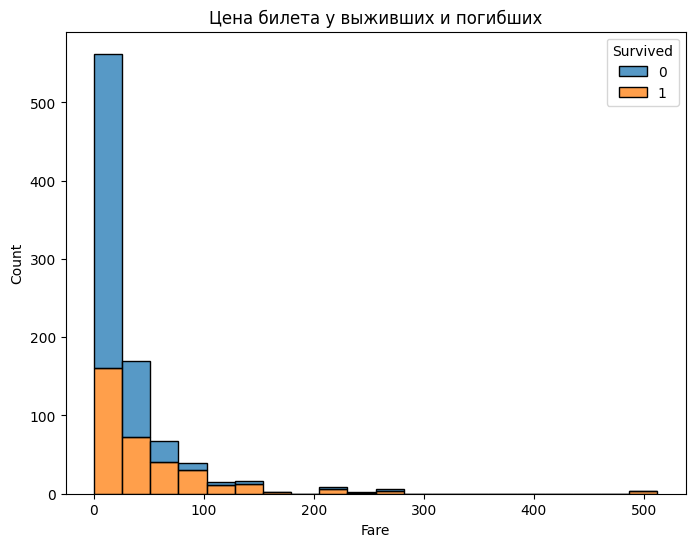

In [8]:
#Посмотрим, как влияла цена билета
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', bins=20)
plt.title('Цена билета у выживших и погибших')
plt.show()

***Вывод:***
Из графика можно заметить, что количество выживших в несколько раз меньше, чем погибших. Это может указывать на то, что пассажиры с низкими ценами на билеты имели меньше шансов на выживаемость.

По средней цене видно, что здесь выжившие состовляют большую часть.

По высокой цене можно заметить, что эти пассажиры имели шансы на выживаемость примерно 50 на 50. 

Соответственно, более состоятельные пассажиры имели более высокую выживаемость

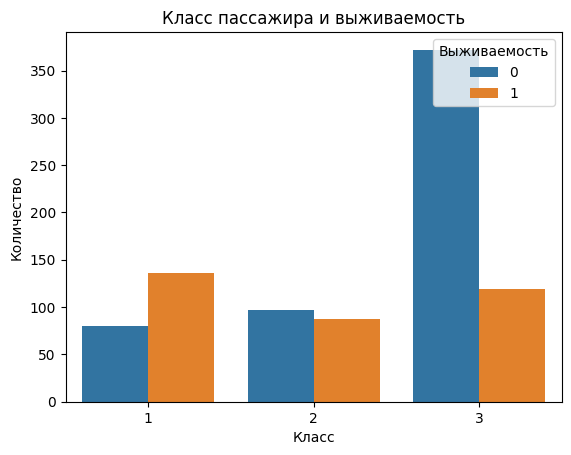

In [19]:
#Посмотрим, как класс пассажира влияет на его выживаемость
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Класс пассажира и выживаемость')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(title='Выживаемость', loc='upper right')
plt.show()

***Вывод***: наиболее высокие шансы выжить имели пассажиры первого и второго класса, 
пассажиры 3-го класса имеют самую низкую выживаемость

/tmp/ipykernel_30/2483862023.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='0', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_30/2483862023.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='1', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

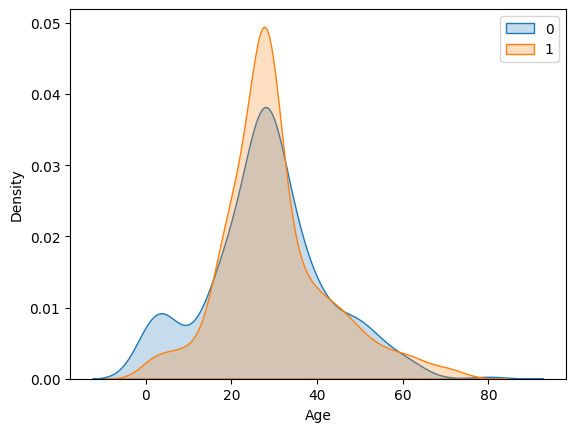

In [21]:
#Построим график плотности распределения по возрасту
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='0', shade=True)
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='1', shade=True)
plt.xlabel('Age')
plt.legend()
plt.show()

***Вывод:*** преимущественно выживали дети и люди от 20 до 40 лет

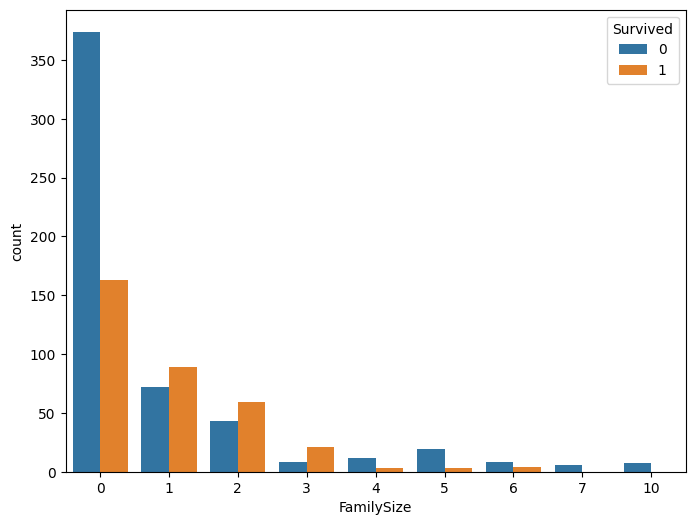

In [23]:
#Создадим новый признак
df['FamilySize'] = df['SibSp'] + df['Parch']
#Благодаря этому графику мы можем увидеть, как влияло количество
#людей в семье на выживаемость
plt.figure(figsize=(8, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.show()

***Вывод:*** маленькие семьи выживали чаще, нежели больше

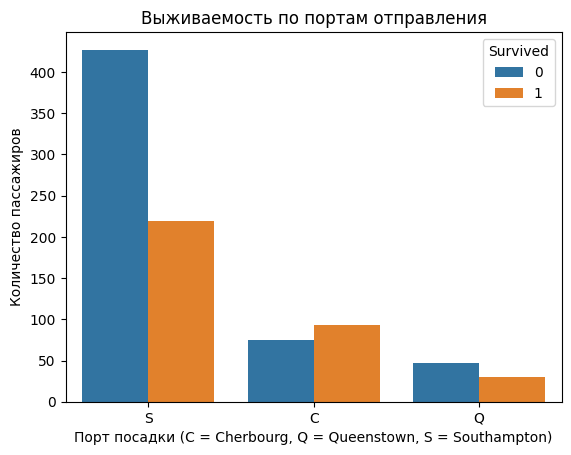

In [25]:
#Посмотрим оказывал ли порт отправления влияние на выживаемость
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Выживаемость по портам отправления')
plt.xlabel('Порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Количество пассажиров')
plt.show()

***Вывод:*** Как можно заметить, люди из, которые садились на Southampton
имели большую выживаемость. Возможно это было связано с тем, что они заходили на корабль самыми последними и имели каюты ближе к спасательным шлюпкам.

# Моделирование

In [27]:
#Признак по полу
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

#Признак: палубы
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Признак: ребенок
df['Is_Child'] = (df['Age'] < 12).astype(int)

# Признак: один был пассажир или нет
df['Is_Single'] = (df['FamilySize'] == 1).astype(int)

# Удалим ненужные колонки
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Is_Child', 'Is_Single', 'Embarked']


In [28]:
print(df[['Pclass', 'Sex', 'Age', 'Fare', 'Is_Child', 'Is_Single', 'Embarked']].head())

   Pclass  Sex   Age     Fare  Is_Child  Is_Single  Embarked
0       3    0  22.0   7.2500         0          1         2
1       1    1  38.0  71.2833         0          1         0
2       3    1  26.0   7.9250         0          0         2
3       1    1  35.0  53.1000         0          1         2
4       3    0  35.0   8.0500         0          0         2


In [29]:
X=df[['Pclass', 'Sex', 'Age', 'Fare', 'Is_Child', 'Is_Single', 'Embarked']]
y =df['Survived']

In [30]:
X

,Pclass,Sex,Age,Fare,Is_Child,Is_Single,Embarked
0,3,0,22.0,7.2500,0,1,2
1,1,1,38.0,71.2833,0,1,0
2,3,1,26.0,7.9250,0,0,2
3,1,1,35.0,53.1000,0,1,2
4,3,0,35.0,8.0500,0,0,2
...,...,...,...,...,...,...,...
886,2,0,27.0,13.0000,0,0,2
887,1,1,19.0,30.0000,0,0,2
888,3,1,28.0,23.4500,0,0,2
889,1,0,26.0,30.0000,0,0,0


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3686 - loss: 0.7414 - val_accuracy: 0.3706 - val_loss: 0.7146
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4370 - loss: 0.7213 - val_accuracy: 0.6154 - val_loss: 0.6851
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6072 - loss: 0.6923 - val_accuracy: 0.6923 - val_loss: 0.6589
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6547 - loss: 0.6639 - val_accuracy: 0.7552 - val_loss: 0.6357
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6916 - loss: 0.6568 - val_accuracy: 0.7972 - val_loss: 0.6150
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7005 - loss: 0.6369 - val_accuracy: 0.8182 - val_loss: 0.5932
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7649 - loss: 0.6041 - val_accuracy: 0.8182 - val_loss: 0.5716
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7547 - loss: 0.5932 - val_accuracy: 0.8182 - val_loss

**Точность модели составляет 81%.**
Это достаточно хороший показатель

<function matplotlib.pyplot.show(close=None, block=None)>

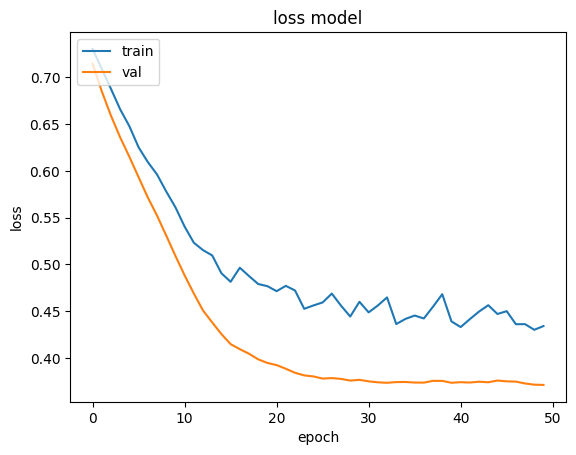

In [34]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show

# Вывод результатов

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

kf = KFold(n_splits=3, shuffle=True, random_state=43)

fold_metrics = []
confusion_matrices = []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    X_test = scaler.transform(X_test)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    print(f"Fold {fold}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    
    # Сохранение метрик для усреднения
    fold_metrics.append((classification_report(y_test, y_pred, output_dict=True), cm))
    confusion_matrices.append(cm)

# Усреднение метрик
avg_confusion_matrix = np.mean(confusion_matrices, axis=0).round().astype(int)

# Вывод средней матрицы ошибок
print("\nСредняя Confusion Matrix:\n", avg_confusion_matrix)

# Подсчет и интерпретация ошибок
TP = avg_confusion_matrix[1, 1]
TN = avg_confusion_matrix[0, 0]
FP = avg_confusion_matrix[0, 1]
FN = avg_confusion_matrix[1, 0]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 1
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       184
           1       0.82      0.60      0.69       113

    accuracy                           0.80       297
   macro avg       0.80      0.76      0.77       297
weighted avg       0.80      0.80      0.79       297

Confusion Matrix:
 [[169  15]
 [ 45  68]]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 2
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       184
           1       0.78      0.73      0.76       113

    accuracy                           0.82       297
   macro avg       0.81      0.80      0.81       297
weighted avg       0.82      0.82      0.82       297

Confusion Matrix:
 [[161  23]
 [ 30  83]]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 3
Classification Report:
               precision    recall  f1-score   sup

***Интерпретация ошибок:***

***Fold1:***
- Модель предсказала, что человек погибнет, а по факту не погибло: 15 случаев.
- Модель предсказала, что человек выживет, а по факту погибло: 45 случаев.
- Модель правильно предсказала, что человек погибнет: 68 случаев.
- Модель правильно предсказала, что человек выживет: 169 случаев.


***Fold2:***
- Модель предсказала, что человек погибнет, а по факту не погибло: 23 случаев.
- Модель предсказала, что человек выживет, а по факту погибло: 30 случаев.
- Модель правильно предсказала, что человек погибнет: 83 случаев.
- Модель правильно предсказала, что человек выживет: 161 случаев.

***Fold3:***
- Модель предсказала, что человек погибнет, а по факту не погибло: 10 случаев.
- Модель предсказала, что человек выживет, а по факту погибло: 37 случаев.
- Модель правильно предсказала, что человек погибнет: 79 случаев.
- Модель правильно предсказала, что человек выживет: 171 случаев.

***Среднее:***
- Модель предсказала, что человек погибнет, а по факту не погибло: 16 случаев.
- Модель предсказала, что человек выживет, а по факту погибло: 37 случаев.
- Модель правильно предсказала, что человек погибнет: 77 случаев.
- Модель правильно предсказала, что человек выживет: 167 случаев.

***Заключение:***
Модель демонстрирует хорошую точность и полноту, однако имеются ошибки: 16 ложных срабатываний (FP): предсказано, что человек погибнет, но он выжил.37 пропущенных случаев (FN): предсказано, что человек выживет, но он погиб.

На основе трех фолдов видно, что модель демонстрирует высокую точность, особенно при предсказании выживших (класс 0), что видно из высокого значения recall (от 0.90 до 0.95) для этого класса. Модель иногда ошибочно относит погибших к выжившим, как подтверждается значением False Negative (30, 37, 40 для разных фолдов)